# Importing of Packages

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC, LinearSVC - too slow
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_auc_score

# Reading in of Data

In [76]:
df = pd.read_csv("train.csv")

# Exploring our Dataset

In [77]:
print(df.head())

   id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   0    Male   21                1         35.0                   0   
1   1    Male   43                1         28.0                   0   
2   2  Female   25                1         14.0                   1   
3   3  Female   35                1          1.0                   0   
4   4  Female   36                1         15.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0    1-2 Year            Yes         65101.0                 124.0      187   
1   > 2 Years            Yes         58911.0                  26.0      288   
2    < 1 Year             No         38043.0                 152.0      254   
3    1-2 Year            Yes          2630.0                 156.0       76   
4    1-2 Year             No         31951.0                 152.0      294   

   Response  
0         0  
1         1  
2         0  
3         0  
4         0  


In [78]:
print(df.dtypes)

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object


In [79]:
print(df.isna().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


In [80]:
print(df["Response"].value_counts())

Response
0    10089739
1     1415059
Name: count, dtype: int64


In [81]:
print(df.describe())

                 id           Age  Driving_License   Region_Code  \
count  1.150480e+07  1.150480e+07     1.150480e+07  1.150480e+07   
mean   5.752398e+06  3.838356e+01     9.980220e-01  2.641869e+01   
std    3.321149e+06  1.499346e+01     4.443120e-02  1.299159e+01   
min    0.000000e+00  2.000000e+01     0.000000e+00  0.000000e+00   
25%    2.876199e+06  2.400000e+01     1.000000e+00  1.500000e+01   
50%    5.752398e+06  3.600000e+01     1.000000e+00  2.800000e+01   
75%    8.628598e+06  4.900000e+01     1.000000e+00  3.500000e+01   
max    1.150480e+07  8.500000e+01     1.000000e+00  5.200000e+01   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel       Vintage  \
count        1.150480e+07    1.150480e+07          1.150480e+07  1.150480e+07   
mean         4.629966e-01    3.046137e+04          1.124254e+02  1.638977e+02   
std          4.986289e-01    1.645475e+04          5.403571e+01  7.997953e+01   
min          0.000000e+00    2.630000e+03          1.000000e+00

In [82]:
print(pd.unique(df['Gender']))
print(pd.unique(df['Vehicle_Age']))
print(pd.unique(df['Vehicle_Damage']))

['Male' 'Female']
['1-2 Year' '> 2 Years' '< 1 Year']
['Yes' 'No']


# Encoding of Categorical Variables
We have a few categorical variables that we will need to encode in order for them to be useful for our machine learning techniques. These are `Gender`, `Vehicle_Age`, `Vehicle_Damage`. We will one hot encode them using `sklearn.preprocessing`'s `OneHotEncoder()`.

In [83]:
categorical_var = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

encoder = OneHotEncoder(drop = 'first', sparse_output = False)

one_hot_encoded = encoder.fit_transform(df[categorical_var])
one_hot_df = pd.DataFrame(one_hot_encoded, columns = encoder.get_feature_names_out(categorical_var))

new_df = pd.concat([df, one_hot_df], axis = 1)
new_df = new_df.drop(categorical_var, axis = 1)

print(new_df.head())

   id  Age  Driving_License  Region_Code  Previously_Insured  Annual_Premium  \
0   0   21                1         35.0                   0         65101.0   
1   1   43                1         28.0                   0         58911.0   
2   2   25                1         14.0                   1         38043.0   
3   3   35                1          1.0                   0          2630.0   
4   4   36                1         15.0                   1         31951.0   

   Policy_Sales_Channel  Vintage  Response  Gender_Male  Vehicle_Age_< 1 Year  \
0                 124.0      187         0          1.0                   0.0   
1                  26.0      288         1          1.0                   0.0   
2                 152.0      254         0          0.0                   1.0   
3                 156.0       76         0          0.0                   0.0   
4                 152.0      294         0          0.0                   0.0   

   Vehicle_Age_> 2 Years  Vehicl

# Dropping of irrelevant features
We will drop the `id` column, since it does not provide us any useful information.

In [84]:
new_df = new_df.drop(['id'], axis = 1)
print(new_df.head())

   Age  Driving_License  Region_Code  Previously_Insured  Annual_Premium  \
0   21                1         35.0                   0         65101.0   
1   43                1         28.0                   0         58911.0   
2   25                1         14.0                   1         38043.0   
3   35                1          1.0                   0          2630.0   
4   36                1         15.0                   1         31951.0   

   Policy_Sales_Channel  Vintage  Response  Gender_Male  Vehicle_Age_< 1 Year  \
0                 124.0      187         0          1.0                   0.0   
1                  26.0      288         1          1.0                   0.0   
2                 152.0      254         0          0.0                   1.0   
3                 156.0       76         0          0.0                   0.0   
4                 152.0      294         0          0.0                   0.0   

   Vehicle_Age_> 2 Years  Vehicle_Damage_Yes  
0        

# Splitting of Train & Test Data

In [85]:
X = new_df.drop('Response', axis = 1)
y = new_df[['Response']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

X_train.reset_index(inplace = True, drop = True)
X_test.reset_index(inplace = True, drop = True)
y_train.reset_index(inplace = True, drop = True)
y_test.reset_index(inplace = True, drop = True)

In [86]:
print(X_train.head())
print(y_train.head())

   Age  Driving_License  Region_Code  Previously_Insured  Annual_Premium  \
0   24                1         28.0                   0         48134.0   
1   49                1         28.0                   1         47971.0   
2   47                1         28.0                   1         45179.0   
3   52                1         35.0                   0         38151.0   
4   48                1         28.0                   0          2630.0   

   Policy_Sales_Channel  Vintage  Gender_Male  Vehicle_Age_< 1 Year  \
0                 152.0      257          1.0                   1.0   
1                 124.0      161          1.0                   0.0   
2                  26.0      175          0.0                   0.0   
3                  26.0      271          0.0                   0.0   
4                 154.0       49          1.0                   0.0   

   Vehicle_Age_> 2 Years  Vehicle_Damage_Yes  
0                    0.0                 1.0  
1                    0

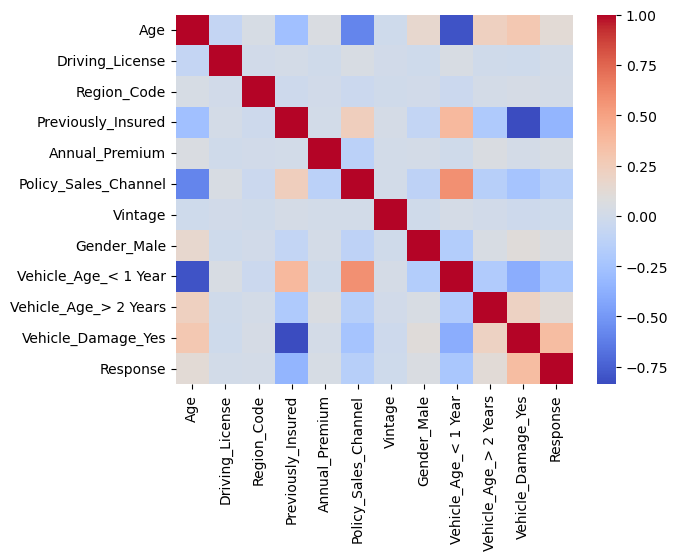

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Response
Age,1.000000,-0.078652,0.036862,-0.276179,0.056398,-0.591516,-0.013374,0.157649,-0.802699,0.220860,0.287938,0.122038
Driving_License,-0.078652,1.000000,-0.001432,0.013680,-0.007317,0.042902,-0.000964,-0.018428,0.039223,-0.006533,-0.015601,0.009245
Region_Code,0.036862,-0.001432,1.000000,-0.022568,-0.001770,-0.037529,-0.005525,-0.000035,-0.039005,0.014294,0.026707,0.012710
Previously_Insured,-0.276179,0.013680,-0.022568,1.000000,0.007638,0.236714,0.019436,-0.087527,0.376665,-0.192353,-0.836205,-0.346023
Annual_Premium,0.056398,-0.007317,-0.001770,0.007638,1.000000,-0.128510,0.003138,0.010606,-0.009677,0.055419,0.012737,0.032431
Policy_Sales_Channel,-0.591516,0.042902,-0.037529,0.236714,-0.128510,1.000000,0.009104,-0.116033,0.579598,-0.149490,-0.240910,-0.152710
Vintage,-0.013374,-0.000964,-0.005525,0.019436,0.003138,0.009104,1.000000,-0.009403,0.019306,-0.003461,-0.019233,-0.015009
Gender_Male,0.157649,-0.018428,-0.000035,-0.087527,0.010606,-0.116033,-0.009403,1.000000,-0.173325,0.045533,0.096805,0.055175
Vehicle_Age_< 1 Year,-0.802699,0.039223,-0.039005,0.376665,-0.009677,0.579598,0.019306,-0.173325,1.000000,-0.184044,-0.386583,-0.219434
Vehicle_Age_> 2 Years,0.220860,-0.006533,0.014294,-0.192353,0.055419,-0.149490,-0.003461,0.045533,-0.184044,1.000000,0.206797,0.111696


In [87]:
sns.heatmap(pd.concat([X_train, y_train], axis = 1).corr(), cmap='coolwarm')
plt.show()

pd.concat([X_train, y_train], axis = 1).corr()

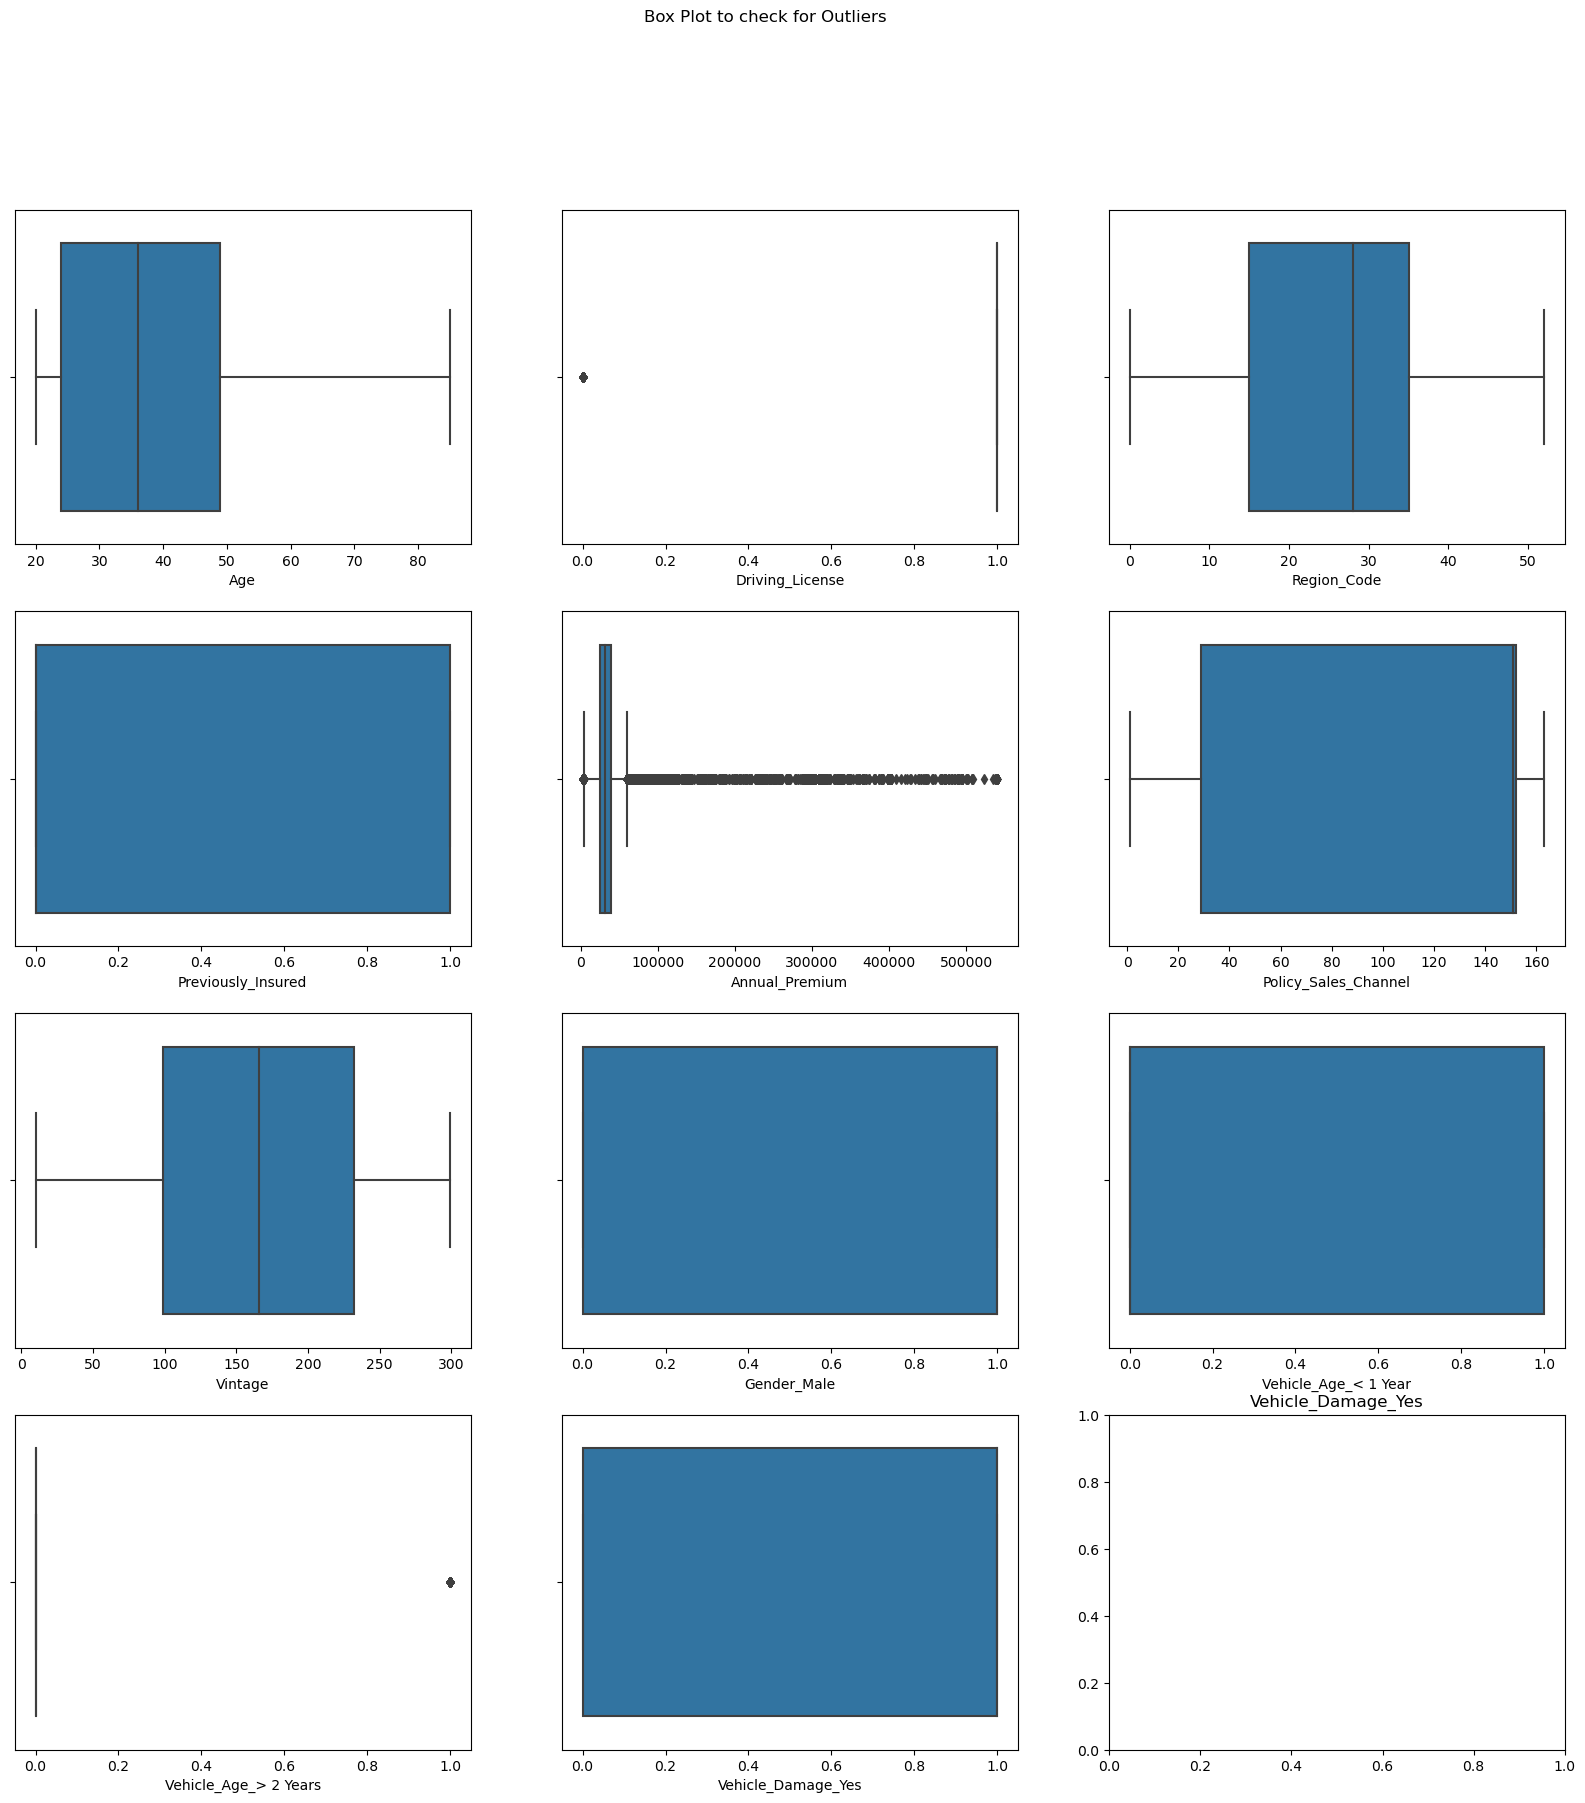

In [88]:
fig,ax = plt.subplots(4,3,figsize=(20,20))
ax = ax.flatten()
plt.suptitle('Box Plot to check for Outliers')
for i, column in enumerate(X_train.columns):
    sns.boxplot(data = X_train, x = column, ax = ax[i])
    plt.title(column)

# Scaling of Numerical features
We will use `sklearn.preprocessing`'s `StandardScaler()` to scale the numerical features, which are `Age`, `Region_Code`, `Annual_Premium`, `Policy_Sales_Channel`, `Vintage`.

In [89]:
num_var = ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

scaler = StandardScaler()

X_train_num = pd.DataFrame(scaler.fit_transform(X_train[num_var]), columns = num_var)
X_test_num = pd.DataFrame(scaler.transform(X_test[num_var]), columns = num_var)

X_train[num_var] = X_train_num
X_test[num_var] = X_test_num

# Model Selection
We will use a variety of models to predict the `Response` variable. We will also use the Area Under ROC parameter to measure the robustness of the models.

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Ridge Classifier": RidgeClassifier(),
    "SGD Classifier": SGDClassifier(),
    "K Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_jobs = -1),
    "AdaBoost": AdaBoostClassifier(n_jobs = -1),
    "Bagging": BaggingClassifier(n_jobs),
    "ExtraTrees": ExtraTreesClassifier()
}

model_results = {"Model":[],
                "ROC_AUC":[]}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_results["Model"].append(model_name)
    model_results["ROC_AUC"].append(roc_auc_score(y_test, y_pred))

results = pd.DataFrame(model_results)


C:\Users\Owent\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Owent\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:1301: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Owent\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Owent\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to 

In [ ]:
print(results)